In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_features=5, noise=15, bias=10, random_state=1)

## here we have tried to get random 10 percent data each time and tried to plt it

In [21]:
class CustomLinearReg:
    
    def __init__(self, lr=0.01, iters=100):
        self.lr = lr
        self.iters = iters
        
    def fit(self, X, y):
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        
        self.theta_ = np.random.randn(X.shape[1], 1)
        
        errors = []
        for i in range(self.iters):
            selected = np.random.randint(0, X.shape[0], 1) #every single item randomly chossen
            error  = self.gradient_descent(X[selected], y[selected])
            errors.append(error)
            
        return errors
            
    def gradient_descent(self, X, y):
        delta_theta, error = self.gradient(X, y) 
        self.theta_ += delta_theta
        return error
        
        
    def gradient(self, X, y):
        ya = y.reshape(-1, 1)  # because the shape of y is (100,) and needed to be cnvt to (100,1)
        yh = self.hypo(X)
        
        dmsedt = np.dot(X.T, (yh-ya)) / X.shape[0]
        
        delta_theta = -dmsedt * self.lr
        error = np.sum((yh-ya)**2) / X.shape[0]
        
        return delta_theta, error
        
    def hypo(self, X):
        return np.dot(X, self.theta_)
    
    def predict(self, X):
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        
        result = self.hypo(X)
        return result.flatten()

In [22]:
model = CustomLinearReg(lr=.1, iters=1000)

In [23]:
errors = model.fit(X, y)

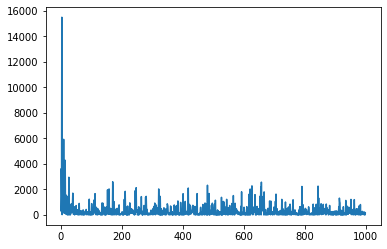

In [24]:
plt.plot(errors)

In [25]:
yh = model.predict(X)

In [26]:
yh[:10]

array([  47.65814795,  102.66099613,  131.69751282,  -51.08863299,
       -284.61363577,   24.58785113,   72.24576593,   55.71766582,
        -18.99896966,   40.8220519 ])

In [27]:
y[:10]

array([  43.5171099 ,   57.65141943,  123.08271761,  -43.37373343,
       -247.57689921,    8.53711187,   41.42818339,   51.97005873,
        -20.65603669,   57.77285488])